# Week 4 - Models and Experimentation

## Step 1 Training a model

For the purposes of this demo, we will be using this [adapted demo](https://www.datacamp.com/tutorial/xgboost-in-python) and training an XGBoost model, and then doing some experimentation and hyperparameter tuning.


If running this notebook locally, use the following steps to create virtual environment:
- Don't use past python 3.10
- To create virtual environment use "venv"

`python -m venv NAME`

- Try to avoid anaconda, poetry or similar package management platforms
- To install a package use pip

`python -m pip install <package-name>`

- once you are done working with this virtual environment, deactivate it with `deactivate`

### Install packages

In [1]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Import data

We will be using Diamonds dataset imported from Seaborn. It is also available on [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds).

Read about the features by following the link. We will be predicting the price of diamonds.

In [3]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
diamonds.shape

(53940, 10)

In [6]:
X,y = diamonds.drop('price', axis=1), diamonds[['price']]

# For the cut, color and clarity use pandas category to enable XGBoost ability to deal with categorical data.

X['cut'] = X['cut'].astype('category')
X['color'] = X['color'].astype('category')
X['clarity'] = X['clarity'].astype('category')

### Split the data and train a model

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [8]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:52:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [9]:
# Define evaluation metrics - Root Mean Squared Error

predictions = model.predict(dtest)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 532.8838153117543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:52:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


### Incorporate validation

In [10]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100

# Create the validation set
evals = [(dtrain, "train"), (dtest, "validation")]

In [11]:
evals = [(dtrain, "train"), (dtest, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10,
)

[0]	train-rmse:2859.49097	validation-rmse:2851.62630
[10]	train-rmse:550.99470	validation-rmse:571.16640


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:52:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[20]	train-rmse:491.51435	validation-rmse:544.08058
[30]	train-rmse:464.38845	validation-rmse:537.01895
[40]	train-rmse:445.99106	validation-rmse:533.85127
[50]	train-rmse:430.36010	validation-rmse:532.90320
[60]	train-rmse:418.87898	validation-rmse:533.04629
[70]	train-rmse:409.66247	validation-rmse:533.58046
[80]	train-rmse:397.34048	validation-rmse:534.31963
[90]	train-rmse:389.94294	validation-rmse:532.61946
[99]	train-rmse:377.70831	validation-rmse:532.88383


In [12]:
# Incorporate early stopping
n = 10000


model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	train-rmse:2859.49097	validation-rmse:2851.62630


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:52:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[50]	train-rmse:430.36010	validation-rmse:532.90320
[100]	train-rmse:377.56825	validation-rmse:532.79980
[103]	train-rmse:375.44970	validation-rmse:532.50220


In [13]:
# Cross-validation

params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:52:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [14]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2861.153015,8.266765,2861.773555,36.937516
1,2081.378004,5.534608,2084.973481,32.064109
2,1545.361682,3.287745,1553.681211,31.059209
3,1182.364236,3.585787,1192.464771,26.157805
4,941.828819,2.971779,958.467497,23.613538


In [15]:
best_rmse = results['test-rmse-mean'].min()

best_rmse

549.1039652582465

## Start W&B


- Login into your W&B profile using the code below
- Alternatively you can set environment variables. There are several env variables which you can set to change the behavior of W&B logging. The most important are:
    - WANDB_API_KEY - find this in your "Settings" section under your profile
    - WANDB_BASE_URL - this is the url of the W&B server

- Find your API Token in "Profile" -> "Setttings" in the W&B App



In [16]:
# Log in to your W&B account
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# TO DO
# Start experiment tracking with W&B
# Do at least 5 experiments with various hyperparameters
# Choose any method for hyperparameter tuning: grid search, random search, bayesian search
# Describe your findings and what you see

In [17]:

# Initialize a new wandb run
wandb.init(project='Practicum', entity='ananyagoel2025')

wandb: Currently logged in as: ananyagoel2025. Use `wandb login --relogin` to force relogin


In [18]:
sweep_config = {
    'method': 'grid',
    'metric': {
        'name': 'reg:squarederror',
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.1, 0.01, 0.001]
        },
        'max_depth': {
            'values': [3, 5, 10]
        },
        'n_estimators': {
            'values': [50, 100, 200]
        }
    }
}


In [20]:

sweep_id = wandb.sweep(sweep_config, project="Practicum", entity='ananyagoel2025')

def train():
    # Initialize a W&B run
    run = wandb.init()

    # Access the hyperparameters through wandb.config
    config = wandb.config

    # Define the model
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': config.learning_rate,
        'max_depth': int(config.max_depth),
        'n_estimators': int(config.n_estimators),
        'eval_metric': 'rmse'
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=config.n_estimators)

    # Evaluate the model
    predictions = model.predict(dtest)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Log metrics
    wandb.log({'rmse': rmse})

    run.finish()

Create sweep with ID: ggjcnac6
Sweep URL: https://wandb.ai/ananyagoel2025/Practicum/sweeps/ggjcnac6


In [21]:
wandb.agent(sweep_id, train)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: 68zp81ql with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


rmse,▁
rmse,712.41742


Exception in thread Exception in thread NetStatThr:
ChkStopThrException in thread Traceback (most recent call last):
:
IntMsgThr  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        self.run()    self.run()
self.run()

  File "/usr/lib/python3.10/threading.py", line 953, in run
  File "/usr/lib/python3.10/threading.py", line 953, in run
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
        self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 286, in check_stop_status
self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 268, in check_network_status
    

rmse,▁
rmse,611.56654


wandb: Agent Starting Run: whbbsk67 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


rmse,▁
rmse,579.33461


wandb: Agent Starting Run: s2ltv2hd with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


rmse,▁
rmse,559.67809


wandb: Agent Starting Run: qplfky8x with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


rmse,▁
rmse,536.95996


wandb: Agent Starting Run: xv03lugd with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


rmse,▁
rmse,531.19823


wandb: Agent Starting Run: u90bsmk5 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


rmse,▁
rmse,536.08837


wandb: Agent Starting Run: prdlar20 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


rmse,▁
rmse,541.94638


wandb: Agent Starting Run: d3zo9k59 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


rmse,▁
rmse,547.25915


wandb: Agent Starting Run: u9tkljmz with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


rmse,▁
rmse,2612.56634


wandb: Agent Starting Run: rea18ysu with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


rmse,▁
rmse,1831.91203


wandb: Agent Starting Run: y9m13trh with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


rmse,▁
rmse,1126.62198


wandb: Agent Starting Run: 0uv5nghd with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


rmse,▁
rmse,2518.54334


wandb: Agent Starting Run: akhmds3u with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


rmse,▁
rmse,1651.71841


wandb: Agent Starting Run: g6tqbau4 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


rmse,▁
rmse,866.4245


wandb: Agent Starting Run: 6rvi88t9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


rmse,▁
rmse,2468.13645


wandb: Agent Starting Run: d3jyqlms with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


rmse,▁
rmse,1569.13835


wandb: Agent Starting Run: 127q7ogb with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


rmse,▁
rmse,773.95576


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6vsayorb with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


rmse,▁
rmse,3813.61584


wandb: Agent Starting Run: iwqcxovq with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


rmse,▁
rmse,3649.3956


wandb: Agent Starting Run: 819cwaxl with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


rmse,▁
rmse,3347.28015


wandb: Agent Starting Run: wtlaguas with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


rmse,▁
rmse,3804.86971


wandb: Agent Starting Run: qgr0sf5v with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


rmse,▁
rmse,3631.27801


wandb: Agent Starting Run: pe9976cv with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


rmse,▁
rmse,3309.49496


wandb: Agent Starting Run: phfmxxm7 with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


rmse,▁
rmse,3798.67156


wandb: Agent Starting Run: kjqttonw with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


rmse,▁
rmse,3619.55827


wandb: Agent Starting Run: jajencwm with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


rmse,▁
rmse,3287.59399


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b0f47fbcf10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b0f47fbcf10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Saving logo.png to logo.png


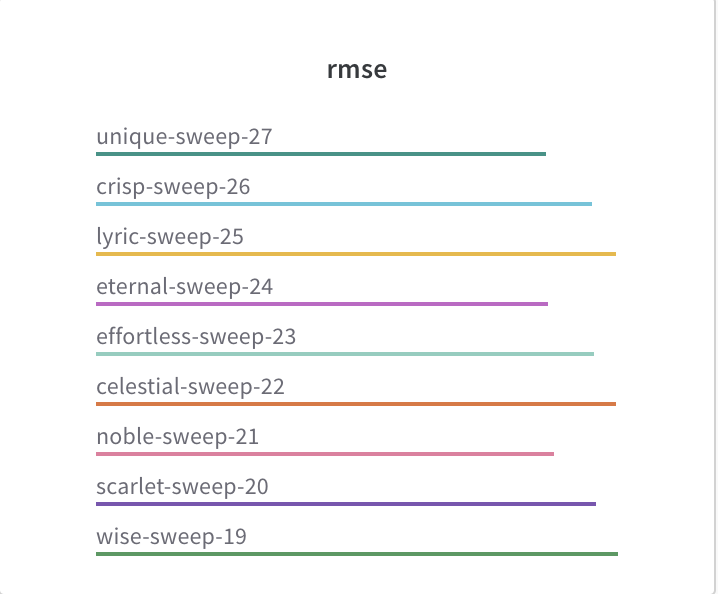

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b0f47fbcf10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [25]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

# Assuming the uploaded file is 'logo.png'
Image('logo.png')

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b0f47fbcf10>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Saving ll.png to ll.png


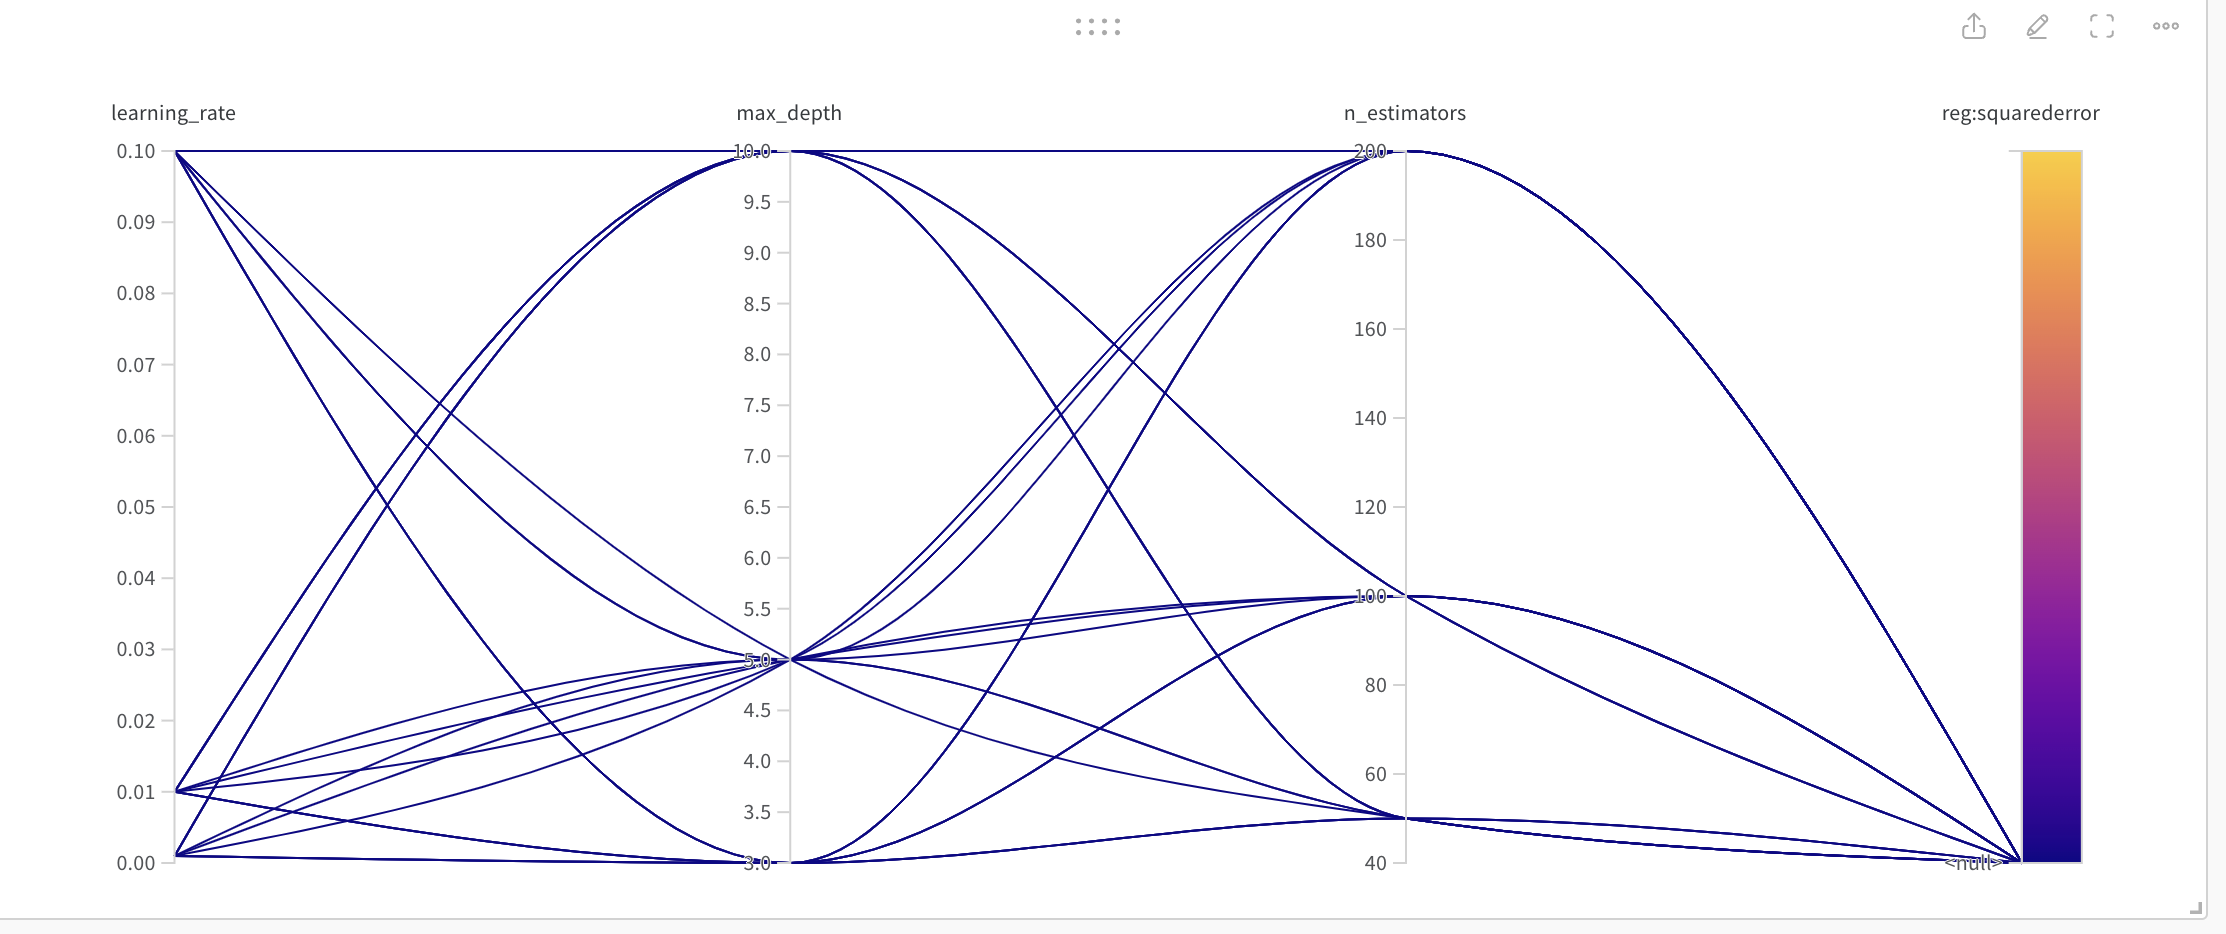

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b0f47fbcf10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [26]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

# Assuming the uploaded file is 'logo.png'
Image('ll.png')

### Adjusted Analysis of Hyperparameters

**Learning Rate (0.001 to 0.10)**
- At very low learning rates, such as near 0.001, the Root Mean Squared Error (RMSE) displays a wide variance, which might indicate inconsistent model performance across different training scenarios.
- As the learning rate increases, there's a noticeable improvement in RMSE, particularly in the range of 0.05 to 0.10, where the error tends to decrease, suggesting these rates are more effective for convergence.
- At higher learning rates, the RMSE increases again, possibly due to the model skipping over optimal solutions due to too large step sizes.

**Max Depth (3 to 10)**
- Optimal performance in terms of RMSE seems to occur at intermediate tree depths. This suggests that a balanced depth helps in capturing sufficient data complexity without overfitting.
- Models with a shallow depth, around 3, generally show poorer performance, which might be attributed to an overly simplistic model that fails to capture the necessary patterns in data.
- Conversely, very deep trees, approaching a depth of 10, often do not improve performance. This might indicate overfitting, where the model learns the noise in the training data instead of the actual signal.

**Number of Estimators (40 to 200)**
- Extremely low or high counts of estimators both lead to increased RMSE, implying that such extremes can detrimentally affect model accuracy.
- Estimators in the middle range appear to optimize RMSE, indicating that there is an ideal number of trees that balances bias and variance effectively.

### Optimal Hyperparameters from the Analysis
The analysis suggests that the best hyperparameters within the tested ranges are likely:
- **Learning Rate**: 0.1
- **Max Depth**: 5
- **Number of Estimators**: 100

These parameters are thought to offer the best compromise between underfitting and overfitting, enhancing the model's ability to learn effectively and generalize well.

### Overview of the Hyperparameter Tuning Experiment
This experiment focuses on fine-tuning three key hyperparameters of a machine learning model: learning rate, tree depth, and the number of estimators. The specific values tested are:
- **Learning Rate**: [0.001, 0.01, 0.1]
- **Max Depth**: [3, 5, 10]
- **Number of Estimators**: [50, 100, 200]

The effectiveness of various parameter combinations is evaluated based on the RMSE metric, providing insights into how each affects the model's accuracy.

